In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [47]:
data= pd.read_csv("/content/Salary_dataset.csv")
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


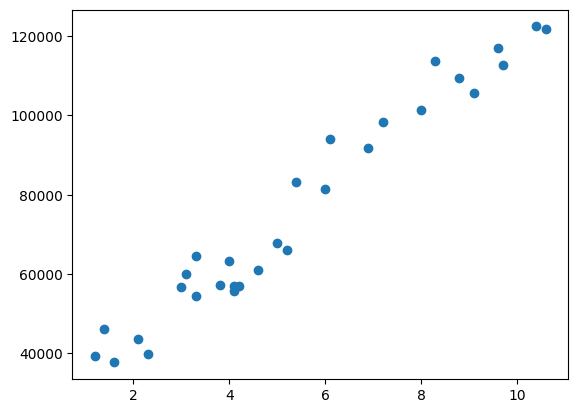

In [48]:
plt.scatter(data.YearsExperience,data.Salary)
plt.show()

In [49]:
# fitting a line to predict unknown values where the line has the least amout of error or mse value.
# so basically, E=1/nsigma(y0i-y)^2
# i.e the predicted value to be substracted by the actual value then taking the summation for all points and squaring.
# the equation for line is y = b₀ + b₁x , where b0 is intercept the bias, and b1 is the slope or y= b+mx

In [50]:
def theRMSE(m,b,points):
  totalError=0
  for i in range(len(points)):
    x = points.iloc[i].YearsExperience
    y = points.iloc[i].Salary
    totalError += (y-(m*x+b))**2
  mse = totalError / float(len(points))
  rmse = mse ** 0.5
  return rmse


In [51]:
# for minimizing the error, we use gradient descent to change the m and b values for which we take derivatives of error function
def gradient_descent(m_new, b_new, L, points):
  m_grad=0
  b_grad=0
  n= len(points)
  for i in range(n):
    x = points.iloc[i].YearsExperience
    y = points.iloc[i].Salary

    m_grad += -(2/n)*x*(y-(m_new*x+b_new))
    b_grad += -(2/n)*(y-(m_new*x+b_new))

  m= m_new -m_grad * L
  b= b_new- b_grad * L
  return m,b


m=0
b=0
L=0.001
epochs= 1000

for i in range(epochs):
  m,b= gradient_descent(m,b,L,data)
  if i % 100 == 0:
        print(f"Epoch {i}: m = {m:.4f}, b = {b:.4f}")


print(m,b)


Epoch 0: m = 970.0088, b = 152.0080
Epoch 100: m = 12679.1243, b = 2815.0372
Epoch 200: m = 12553.3726, b = 3703.0567
Epoch 300: m = 12428.3841, b = 4554.6798
Epoch 400: m = 12308.4279, b = 5372.0035
Epoch 500: m = 12193.3029, b = 6156.4094
Epoch 600: m = 12082.8146, b = 6909.2232
Epoch 700: m = 11976.7762, b = 7631.7174
Epoch 800: m = 11875.0085, b = 8325.1131
Epoch 900: m = 11777.3396, b = 8990.5822
11684.522618790954 9622.991910271252


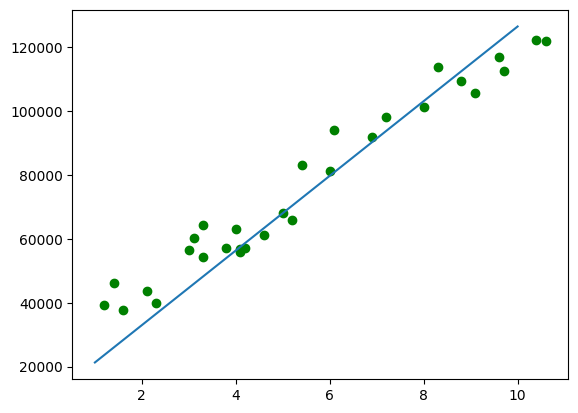

In [53]:
plt.scatter(data.YearsExperience,data.Salary, color="green")
plt.plot(list(range(1,11)),[m*x + b for x in range(1,11)])
plt.show()

In [54]:
error= theRMSE(m,b,data)
print(error)
import random
print(random.choice(data.Salary))

8940.55908378805
116970.0


In [55]:
# so to predict any new value we use the y=mx+b and substitute
def predict_sal(yrs,m,b):
  return m* yrs +b

predictn= predict_sal(15,m,b)
print(predictn)


184890.83119213558
